
- Pandas란 AQR Capital Management 에서 2008년 개발시작, 2009년말 오픈소스가 됨. 
- 데이터 조작을 빠르고 효율적으로 처리하기위한 DataFrame  개체
- CSV 및 텍스트 파일, Microsoft Excel, SQL 데이터베이스, HDF5 형식 읽기 및 쓰기도구
- 데이터 정렬 및 누락된 데이터의 통합처리 가능
- 데이터 세트의 유연한 재구성 및  피벗
- 대규모 데이터 세트의 레이블 기반 슬라이싱, 인덱싱
- 데이터 세트의 병합 및 결합
- 시계열 기능

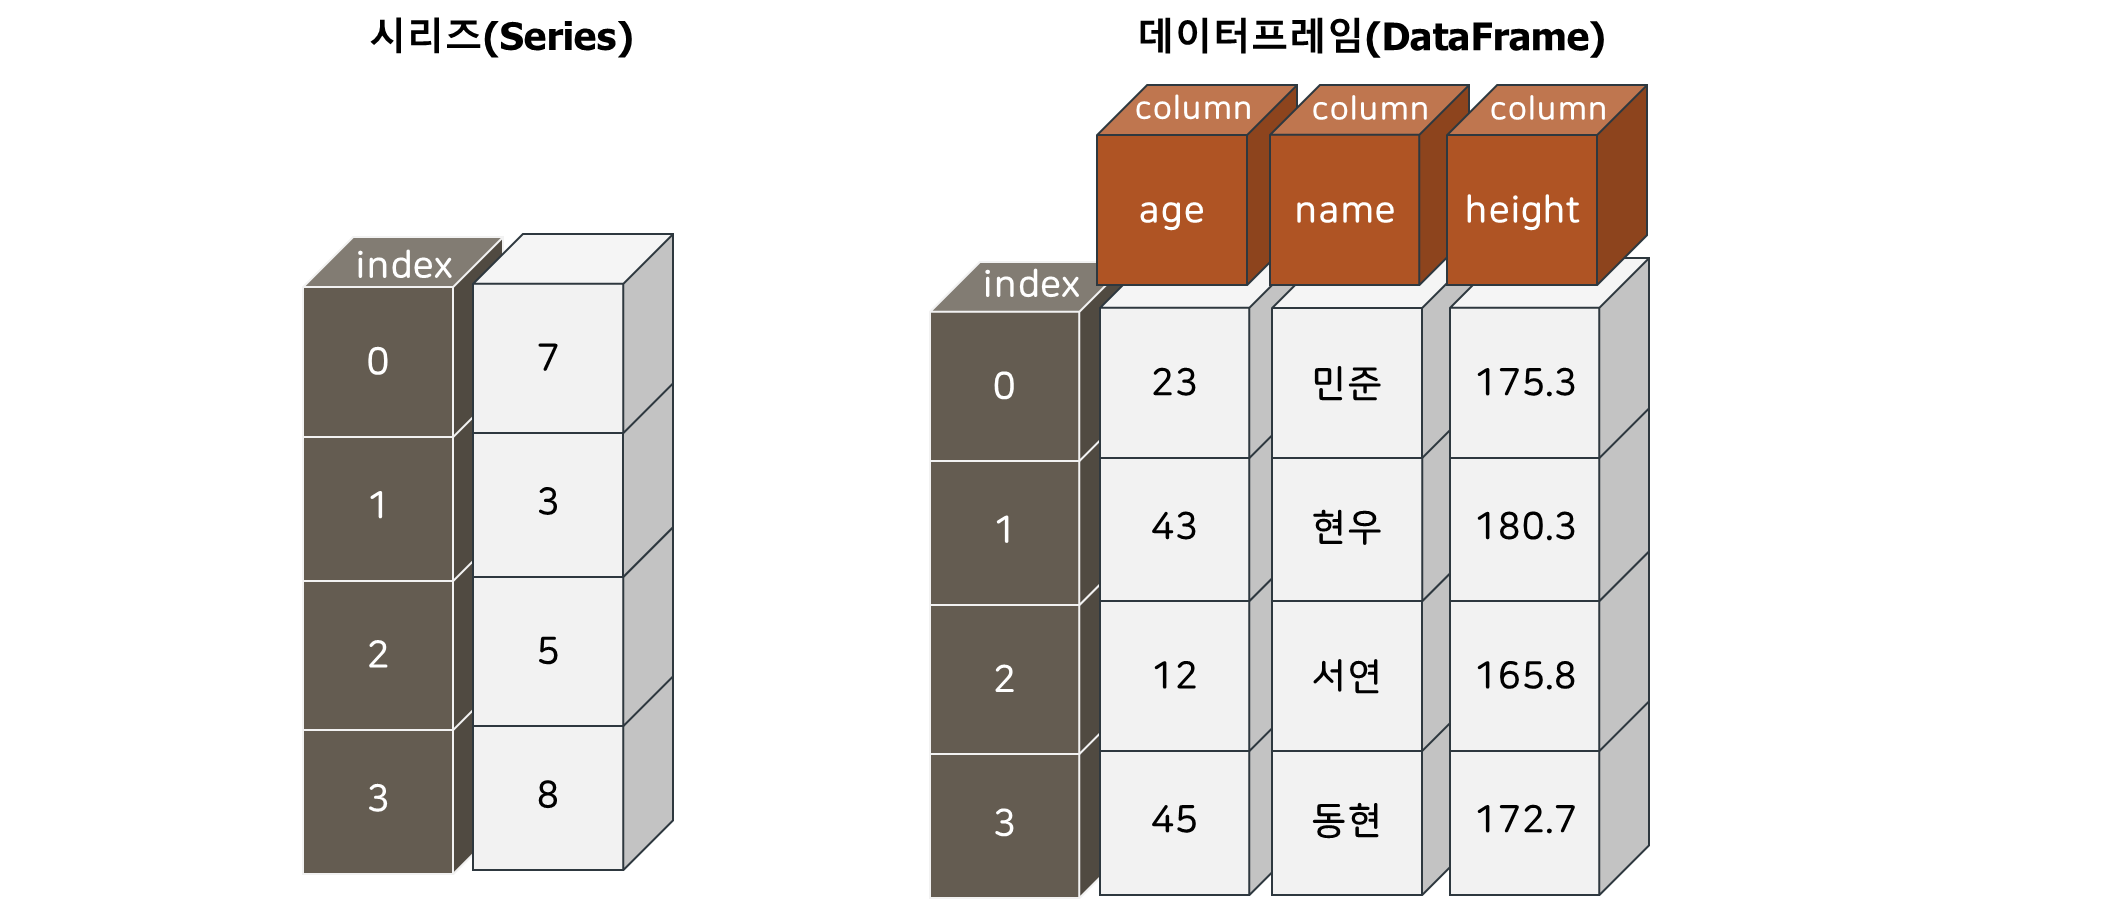

#1.Series
- 복수의 행(row)으로 이루어진 하나의 열(column) 구조
- 색인(index)을 가지고 원하는 데이터에 접근할 수 있음
- 자동으로 색인을 만들어 줌
- 자동으로 색인을 만들지 않고 index 키워드를 사용해 원하는 색인의 이름을 입력
- 색인을 나열하여 원하는 값들을 출력


In [ ]:
import pandas as pd

In [ ]:
a=[7, 3, 5, 8]
a

[7, 3, 5, 8]

In [ ]:
b=pd.Series(a)
b

0    7
1    3
2    5
3    8
dtype: int64

In [ ]:
c=pd.Series([7, 3, 5, 8], index=['서울', '대구', '부산', '광주'])
c

서울    7
대구    3
부산    5
광주    8
dtype: int64

In [ ]:
c[['서울', '대구']]

서울    7
대구    3
dtype: int64

In [ ]:
# index : 만들어진 시리즈에서 인덱스만을 출력
c.index

Index(['서울', '대구', '부산', '광주'], dtype='object')

In [ ]:
# values : 만들어진 시리즈 데이터에서 값들만을 출력
c.values

array([7, 3, 5, 8])

In [ ]:
# sorted() 함수 : 인덱스나 값들로 정렬
d=sorted(c.index)
d

['광주', '대구', '부산', '서울']

In [ ]:
sorted(c.values)

[3, 5, 7, 8]

In [ ]:
c

서울    7
대구    3
부산    5
광주    8
dtype: int64

In [ ]:
d = c.reindex(sorted(c.index))
d

광주    8
대구    3
부산    5
서울    7
dtype: int64

In [ ]:
e = pd.Series([2, 4, 5, 1], index=['대구', '부산', '서울', '대전'])
e

대구    2
부산    4
서울    5
대전    1
dtype: int64

In [ ]:
# 시리즈의 합 : 인덱스별로 저장된 값들의 합을 구함
# d와 e에 공통된 인덱스가 존재해야 더할 수 있으므로 광주와 대전은 NaN으로 표시 
d+e

광주     NaN
대구     5.0
대전     NaN
부산     9.0
서울    12.0
dtype: float64

#2.DataFrame
- 2차원 배열
- 행과 열로 구성
- 열(Column)에 대한 각각의 이름을 부여


In [ ]:
data = {'age' : [23, 43, 12, 45],
        'name' : ['민준', '현우', '서연', '동현'],
        'height' : [175.3, 180.3, 165.8, 172.7]}
x = pd.DataFrame(data, columns = ['name', 'age', 'height'])
x

,name,age,height
0,민준,23,175.3
1,현우,43,180.3
2,서연,12,165.8
3,동현,45,172.7


In [ ]:
x.name

0    민준
1    현우
2    서연
3    동현
Name: name, dtype: object

In [ ]:
rank = [[1, 2], [3, 4], [5, 6]]
data = pd.DataFrame(rank, columns=['First', 'Second'])
data

,First,Second
0,1,2
1,3,4
2,5,6


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# csv 또는 txt 파일을 가져와서 Panas 형식으로 저장
data = pd.read_csv('/content/drive/MyDrive/BigData_Study/test_data_utf8.csv')  #encoding='utf-8'
data.head(10)

,시도,온도,PM10
0,서울,28.10,65.20
1,인천,23.15,78.20
2,수원,25.54,82.30
3,안양,26.20,80.50
4,춘천,22.53,75.36
5,파주,26.81,79.15
6,고양,15.59,76.91
7,의왕,23.88,81.85
8,군포,26.48,69.32


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BigData_Study/test_data.csv',encoding='CP949')
data.head()

,시도,온도,PM10
0,서울,28.10,65.20
1,인천,23.15,78.20
2,수원,25.54,82.30
3,안양,26.20,80.50
4,춘천,22.53,75.36


In [ ]:
# head() : 첫 행부터 입력한 수만큼의 행이 출력됨, 입력하지 않으면 첫 5줄의 행을 출력

data.head(2)

,First,Second
0,1,2
1,3,4


In [ ]:
# tail() : 끝 행부터 입력한 수만큼의 행이 출력됨, 입력하지 않으면 끝 5줄의 행을 출력

data.tail(2)

,First,Second
1,3,4
2,5,6


In [ ]:
# iloc() :  메소드를 사용하여 특정한 행이나 위치의 내용들을 지정하여 출력

data.iloc[1]    #인덱스 1의 값들을 출력

First     3
Second    4
Name: 1, dtype: int64

In [ ]:
data.iloc[-1,-1]

6

In [ ]:
data.iloc[:, -1]     #모든 행의 마지막 데이터만을 출력

0    2
1    4
2    6
Name: Second, dtype: int64

##가.DataFrame의 속성
- shape : DataFrame의 행과 열을 튜플 형태로 반환
- info() : 컬럼별 총 데이터 건수, 데이터타입, Null 건수를 확인

In [ ]:
data

,시도,온도,PM10
0,서울,28.10,65.20
1,인천,23.15,78.20
2,수원,25.54,82.30
3,안양,26.20,80.50
4,춘천,22.53,75.36
5,파주,26.81,79.15
6,고양,15.59,76.91
7,의왕,23.88,81.85
8,군포,26.48,69.32


In [ ]:
data.shape

(9, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      9 non-null      object 
 1   온도      9 non-null      float64
 2   PM10    9 non-null      float64
dtypes: float64(2), object(1)
memory usage: 344.0+ bytes


## 나. pandas의 통계함수
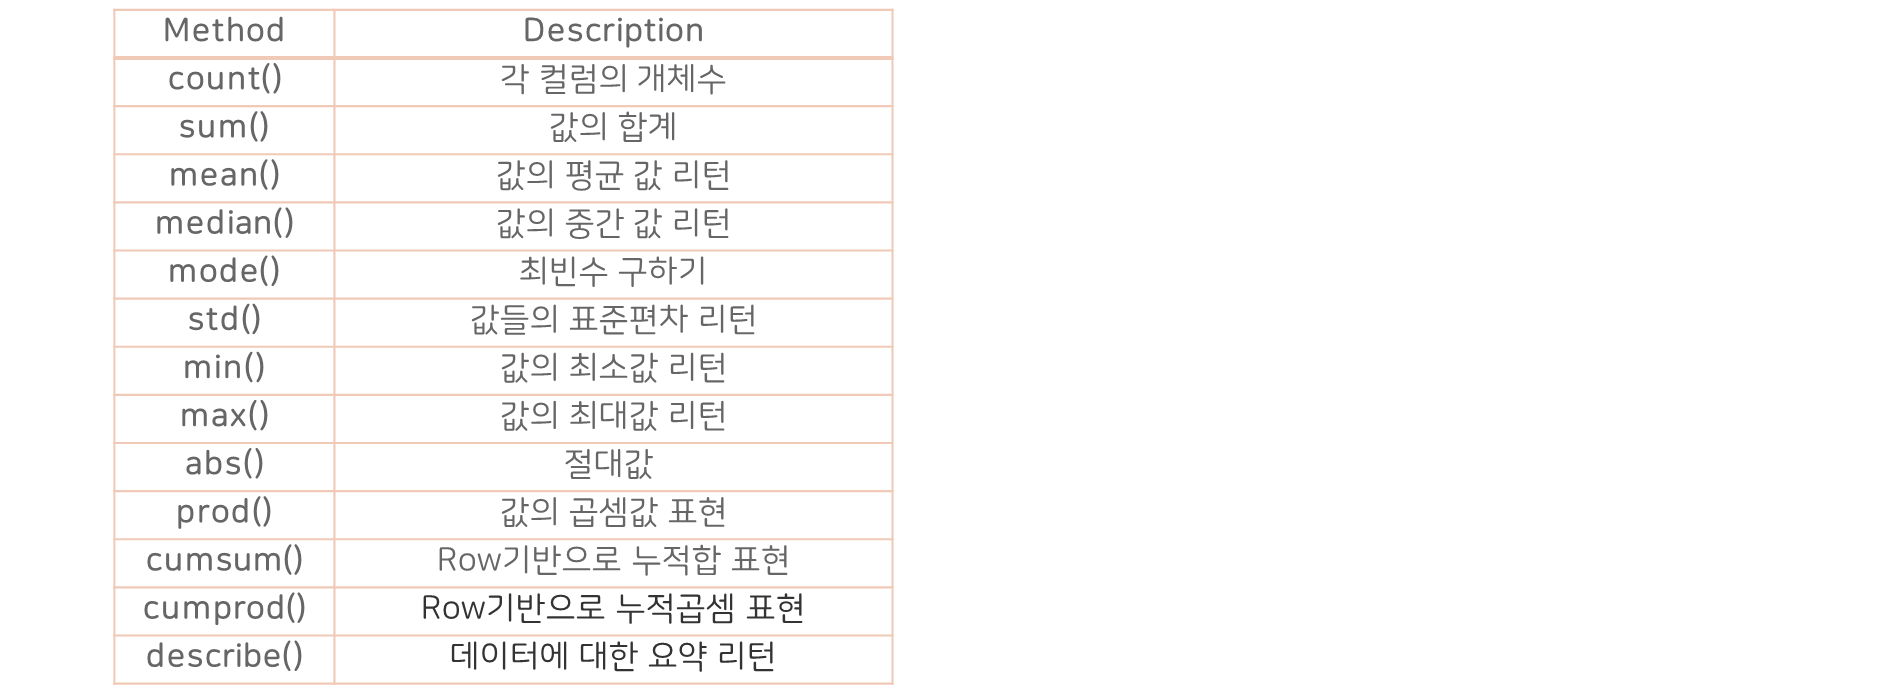

In [ ]:
data

,시도,온도,PM10
0,서울,28.10,65.20
1,인천,23.15,78.20
2,수원,25.54,82.30
3,안양,26.20,80.50
4,춘천,22.53,75.36
5,파주,26.81,79.15
6,고양,15.59,76.91
7,의왕,23.88,81.85
8,군포,26.48,69.32


In [ ]:
data.sum()

시도      서울인천수원안양춘천파주고양의왕군포
온도                  218.28
PM10                688.79
dtype: object

In [ ]:
x_describe = data.describe()
x_describe 
# 숫자형 데이터에 대한 컬럼만 출력

,온도,PM10
count,9.000000,9.000000
mean,24.253333,76.532222
std,3.726869,5.797367
min,15.590000,65.200000
25%,23.150000,75.360000
50%,25.540000,78.200000
75%,26.480000,80.500000
max,28.100000,82.300000


##다. index 설정
 * DataFrame.set_index(key, drop = True, append =False, inplace = False) : 컬럼을 index로 설정

 * DataFrame.reset_index(level=None, drop = True, inplace = False ) : 컬럼을 index로 설정
- keys : 컬럼명, 리스트와 배열로 입력가능
- drop : 새로운 인덱스로 사용된 열 삭제
- append : 기존에 존재하는 인덱스에 이어 붙일 것인지 여부 결정
- inplace : 데이터의 원본을 변경할지 여부 선택

In [ ]:
# dataframe열을 인덱스로 설정
re_data=data.set_index('시도')
re_data

,온도,PM10
시도,,
서울,28.10,65.20
인천,23.15,78.20
수원,25.54,82.30
안양,26.20,80.50
춘천,22.53,75.36
파주,26.81,79.15
고양,15.59,76.91
의왕,23.88,81.85
군포,26.48,69.32


In [ ]:
re_data.reset_index()

,시도,온도,PM10
0,서울,28.10,65.20
1,인천,23.15,78.20
2,수원,25.54,82.30
3,안양,26.20,80.50
4,춘천,22.53,75.36
5,파주,26.81,79.15
6,고양,15.59,76.91
7,의왕,23.88,81.85
8,군포,26.48,69.32


In [ ]:
re_data

,온도,PM10
시도,,
서울,28.10,65.20
인천,23.15,78.20
수원,25.54,82.30
안양,26.20,80.50
춘천,22.53,75.36
파주,26.81,79.15
고양,15.59,76.91
의왕,23.88,81.85
군포,26.48,69.32


In [ ]:
re_data.reset_index(inplace=True)
re_data

,시도,온도,PM10
0,서울,28.10,65.20
1,인천,23.15,78.20
2,수원,25.54,82.30
3,안양,26.20,80.50
4,춘천,22.53,75.36
5,파주,26.81,79.15
6,고양,15.59,76.91
7,의왕,23.88,81.85
8,군포,26.48,69.32


In [ ]:
re_data

,시도,온도,PM10
0,서울,28.10,65.20
1,인천,23.15,78.20
2,수원,25.54,82.30
3,안양,26.20,80.50
4,춘천,22.53,75.36
5,파주,26.81,79.15
6,고양,15.59,76.91
7,의왕,23.88,81.85
8,군포,26.48,69.32


In [ ]:
re_data.sum()

시도      서울인천수원안양춘천파주고양의왕군포
온도                  218.28
PM10                688.79
dtype: object

In [ ]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      9 non-null      object 
 1   온도      9 non-null      float64
 2   PM10    9 non-null      float64
dtypes: float64(2), object(1)
memory usage: 344.0+ bytes


## 라. pandas 읽고 쓰기
* csv로 저장
 - to_csv("파일이름(경로)")

In [ ]:
re_data.to_csv("/content/drive/MyDrive/BigData_Study/re_data.csv")

* excel 로 저장
 - to_excel("파일이름(경로)")

In [ ]:
re_data.to_excel("/content/drive/MyDrive/BigData_Study/re_data.xlsx")

In [ ]:
pwd = '/content/drive/MyDrive/BigData_Study/'
re_data.to_excel(pwd+"re_data.xlsx")

* 여러개의 데이터프레임을 하나의 excel 파일로 저장
 - 엑셀파일변수 = pd.ExcelWriter("파일이름(경로)")
 - to_excel(엑셀파일변수, sheet_name = "시트이름")
 - 엑셀파일변수.save()

In [ ]:
writer = pd.ExcelWriter(pwd+"dataframe.xlsx")
re_data.to_excel(writer, sheet_name = "re_data")
data.to_excel(writer, sheet_name = "data")
writer.save()

In [ ]:
with pd.ExcelWriter(pwd+"dataframe2.xlsx") as writer :
  re_data.to_excel(writer, sheet_name = "re_data")
  data.to_excel(writer, sheet_name = "data")

# 3.데이터 프레임 합치기
* concatenating(연결)

 - 동일한 index나 columns을 가지고 있는 경우, 연속적으로 붙히기
* merging(병합) 

 - 공통된 하나의 열(또는 행)을 기준으로 동일한 값을 가지는 행을 각 DataFrame에서 찾은뒤 n개 × m개 조합으로 행을 모두 가지도록 합치는 경우


## 가.Concatenating(연결)
* concatenating은 두 DataFrame을 행 방향(default로 할시) or 열방향으로 단순 연결
* pd.concat([데이터프레임명1,데이터프레임명1]) 으로 연결

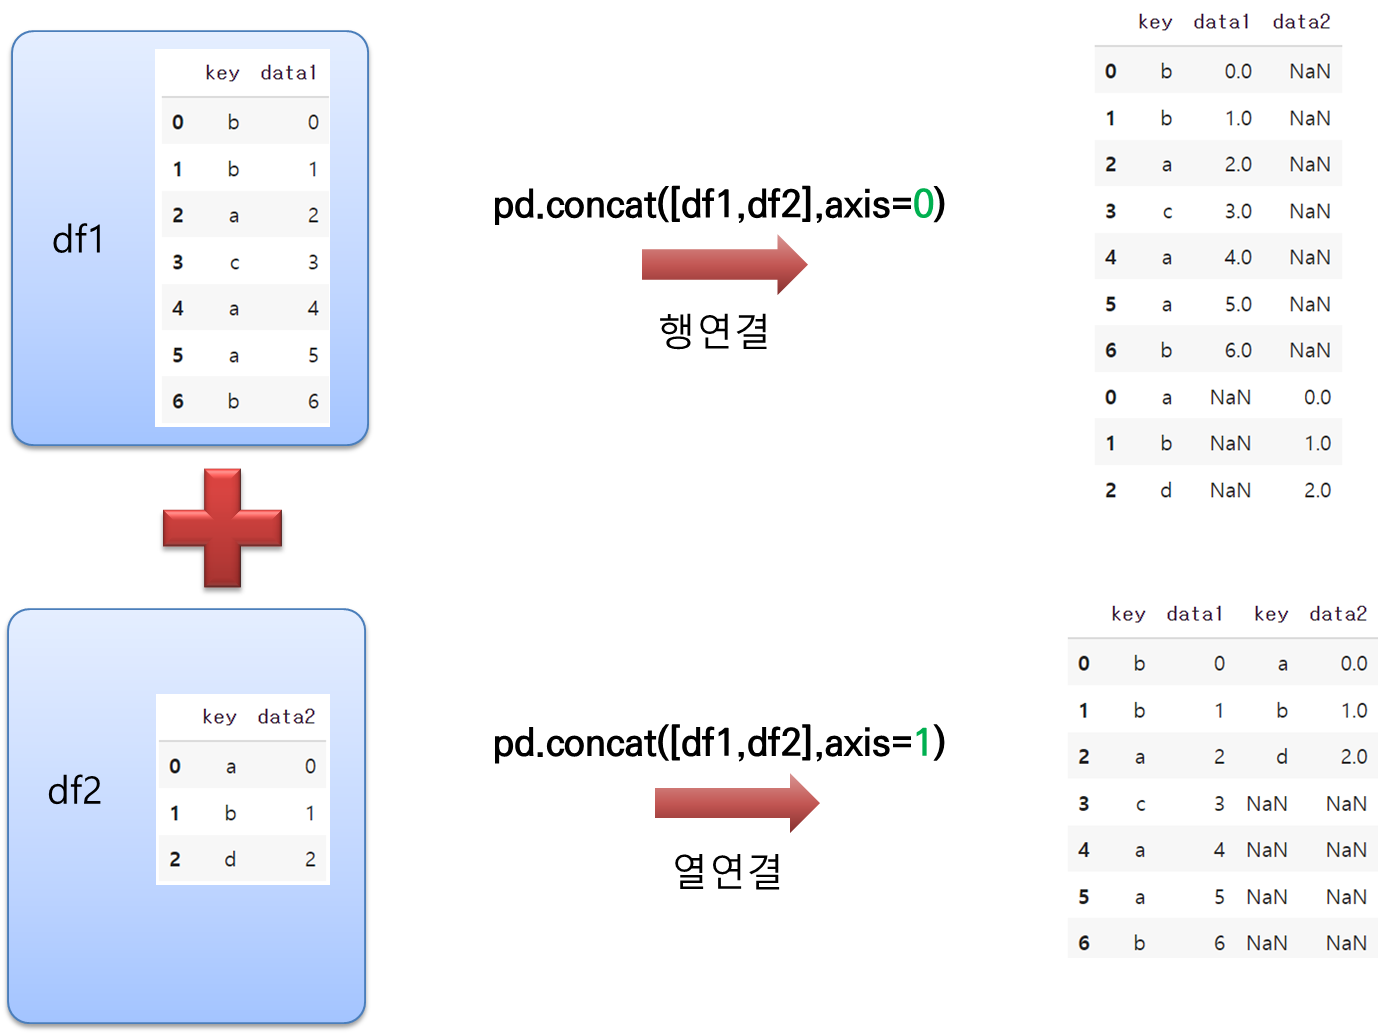

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 예제 데이터프레임 작성
df1 = pd.DataFrame({"key":list('bbacaab'),"data1":range(7)})
df2 = pd.DataFrame({"key":list("abd"),"data2":range(3)})

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.concat([df1,df2])  # 밑으로 단순히 붙이는 명령

,key,data1,data2
0,b,0.0,NaN
1,b,1.0,NaN
2,a,2.0,NaN
3,c,3.0,NaN
4,a,4.0,NaN
5,a,5.0,NaN
6,b,6.0,NaN
0,a,NaN,0.0
1,b,NaN,1.0
2,d,NaN,2.0


In [ ]:
pd.concat([df1,df2],axis=0) # axis=0 이 디폴트임.(행으로 붙임)

,key,data1,data2
0,b,0.0,NaN
1,b,1.0,NaN
2,a,2.0,NaN
3,c,3.0,NaN
4,a,4.0,NaN
5,a,5.0,NaN
6,b,6.0,NaN
0,a,NaN,0.0
1,b,NaN,1.0
2,d,NaN,2.0


In [ ]:
pd.concat([df1,df2],axis=1) # axis= 1 을 넣으면 열로 붙음.

,key,data1,key,data2
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,NaN,NaN
4,a,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


## 나.merging(병합)

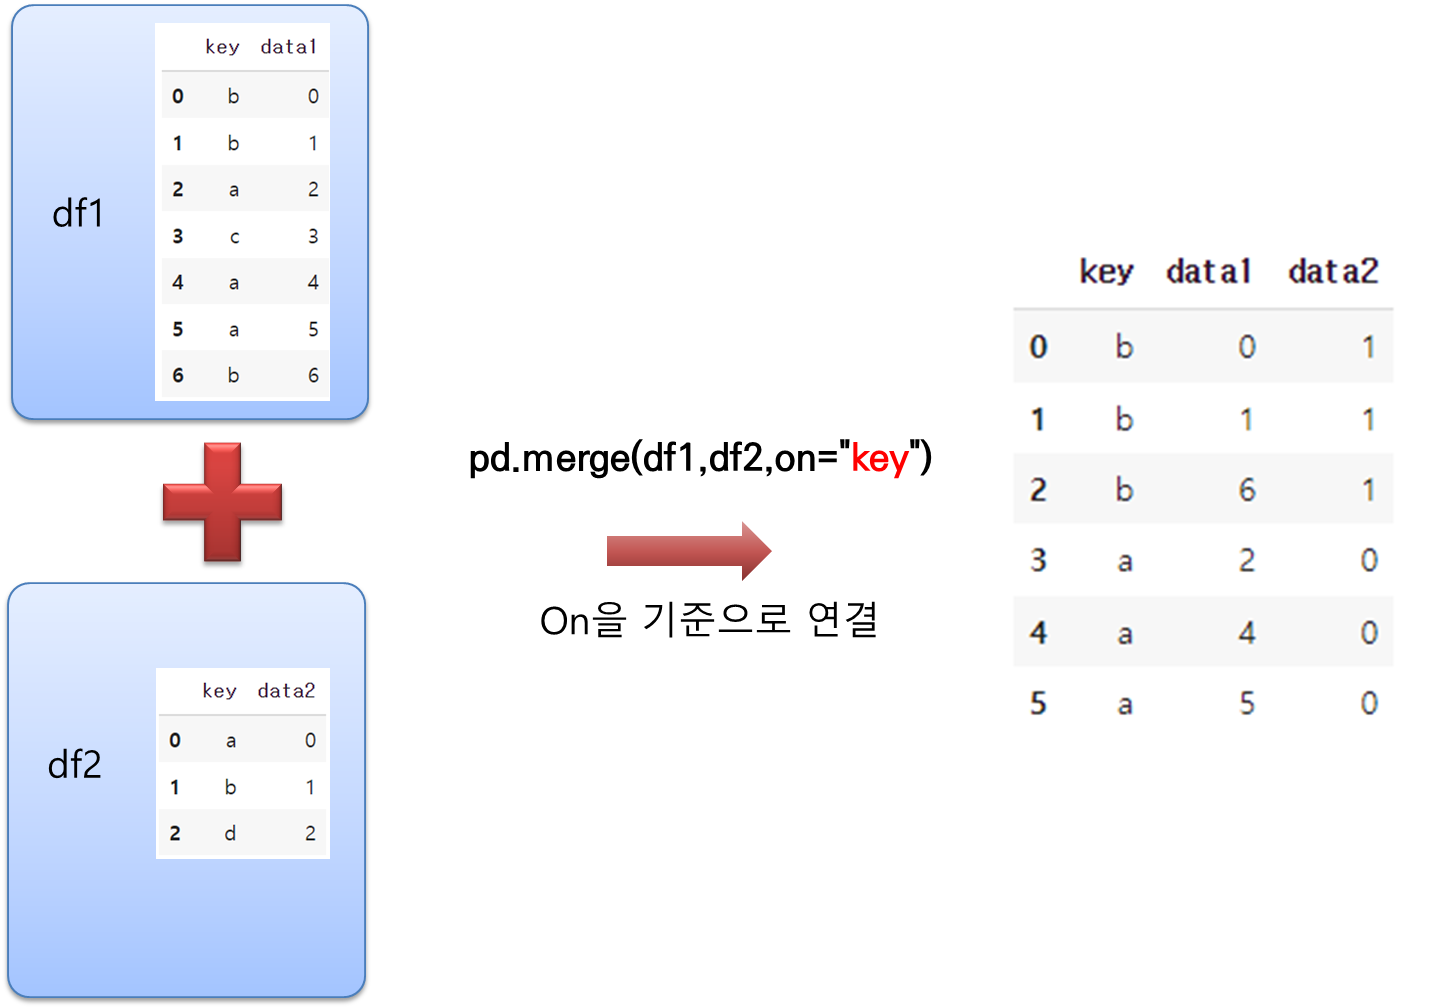

In [ ]:
pd.merge(df1,df2,on="key")
# df1의 key열의 "c","d"는 df2의 key열이 없기 때문에 결과에 안나옴.

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


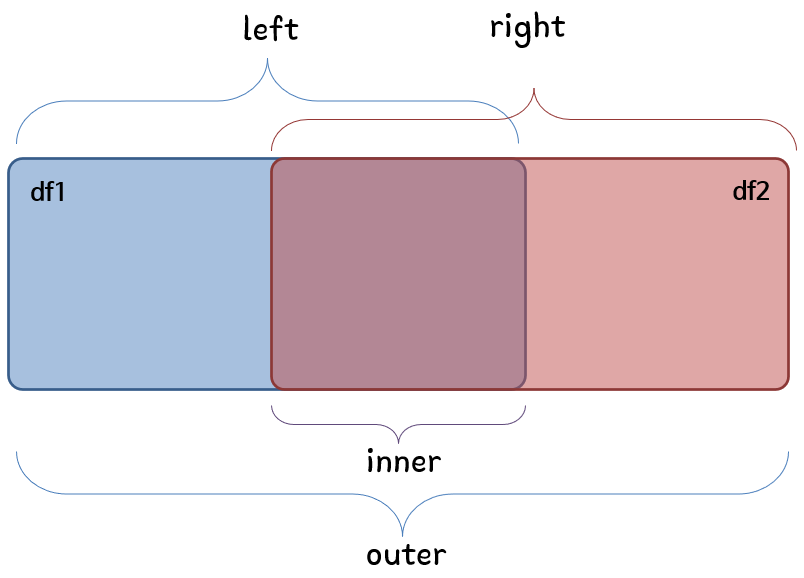

In [ ]:
pd.merge(df1,df2,on="key", how = "outer")
# data가 없는경우 NaN으로 나옴

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [ ]:
pd.merge(df1,df2,on="key", how = "left")
# df1을 기준으로 df2가 붙음

,key,data1,data2
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
pd.merge(df1,df2,on="key", how = "right")
# df2을 기준으로 df1가 붙음

,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,a,5.0,0
3,b,0.0,1
4,b,1.0,1
5,b,6.0,1
6,d,NaN,2


 - key의 칼럼명이 같지 않을경우

In [ ]:
df3 = pd.DataFrame({"lkey":list('bbacaab'),"data1":range(7)})
df4 = pd.DataFrame({"rkey":list("abd"),"data2":range(3)})

In [ ]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df3,df4,left_on="lkey", right_on="rkey")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


 - index를 key로 사용하여 merge

In [ ]:
df5_i=pd.DataFrame({"group_val":[3.5,7]},index=['a','b'])

In [ ]:
df5_i

,group_val
a,3.5
b,7.0


In [ ]:
pd.merge(df1,df5_i,left_on="key",right_index=True)

,key,data1,group_val
0,b,0,7.0
1,b,1,7.0
6,b,6,7.0
2,a,2,3.5
4,a,4,3.5
5,a,5,3.5


In [ ]:
left=pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]], 
                   index=['a','c','e'],columns=['Seoul','Incheon'])
right=pd.DataFrame([[7.,8.],[9.,10],[11.,12.],[13,14]], 
                   index=['b','c','d','e'],columns=['Daegu','Ulsan'])


In [ ]:
left

,Seoul,Incheon
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [ ]:
right

,Daegu,Ulsan
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [ ]:
pd.merge(left,right,how='outer',left_index=True,right_index=True)

,Seoul,Incheon,Daegu,Ulsan
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


# 4.reshaping data

## 가.pivot table

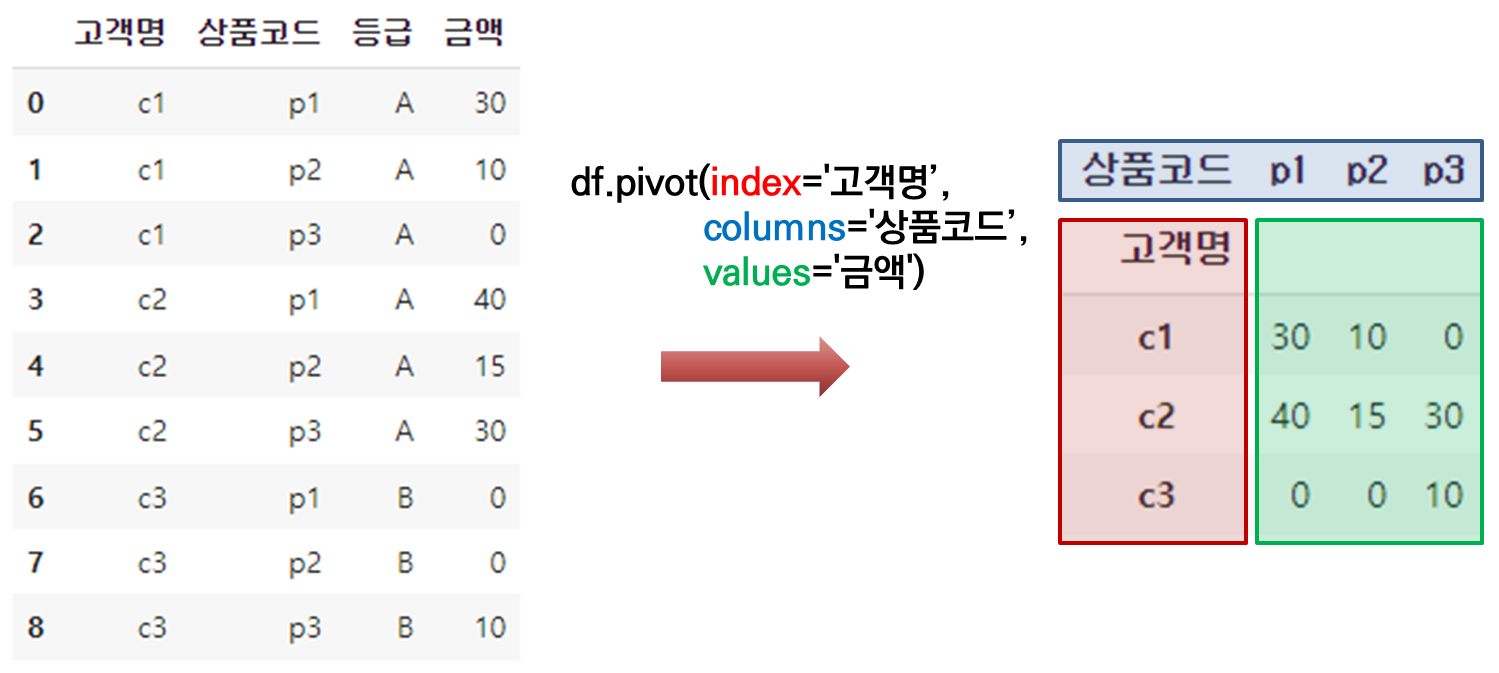

In [ ]:
# 데이터 만들기
data = pd.DataFrame({'고객명': ['c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3'],
                     '상품코드': ['p1', 'p2', 'p3', 'p1', 'p2', 'p3', 'p1', 'p2', 'p3'],
                     '등급' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B'],
                     '금액': [30, 10, 0, 40, 15, 30, 0, 0, 10]})

In [ ]:
data

,고객명,상품코드,등급,금액
0,c1,p1,A,30
1,c1,p2,A,10
2,c1,p3,A,0
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30
6,c3,p1,B,0
7,c3,p2,B,0
8,c3,p3,B,10


In [ ]:
data_pivot = data.pivot(index='고객명', columns='상품코드', values='금액')
data_pivot

상품코드,p1,p2,p3
고객명,,,
c1,30,10,0
c2,40,15,30
c3,0,0,10


In [ ]:
pd.pivot_table(data, index='고객명', columns='상품코드', values='금액')

상품코드,p1,p2,p3
고객명,,,
c1,30,10,0
c2,40,15,30
c3,0,0,10


In [ ]:
 #columns 2개인 경우
pd.pivot_table(data, index='고객명', columns=['상품코드','등급'], values='금액') 

상품코드    p1         p2         p3      
등급       A    B     A    B     A     B
고객명                                   
c1    30.0  NaN  10.0  NaN   0.0   NaN
c2    40.0  NaN  15.0  NaN  30.0   NaN
c3     NaN  0.0   NaN  0.0   NaN  10.0

In [ ]:
 #index 2개인 경우
pd.pivot_table(data, index=['고객명', '등급'], columns='상품코드', values='금액') 

,상품코드,p1,p2,p3
고객명,등급,,,
c1,A,30,10,0
c2,A,40,15,30
c3,B,0,0,10


In [ ]:
data

,고객명,상품코드,등급,금액
0,c1,p1,A,30
1,c1,p2,A,10
2,c1,p3,A,0
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30
6,c3,p1,B,0
7,c3,p2,B,0
8,c3,p3,B,10


In [ ]:
pd.pivot_table(data, index='고객명', values='금액')  #columns 없는 경우 집계의 디폴트는 평균 

,금액
고객명,
c1,13.333333
c2,28.333333
c3,3.333333


In [ ]:
# 합계로 변경
pd.pivot_table(data, index='고객명', values='금액',aggfunc=np.sum)  

,금액
고객명,
c1,40
c2,85
c3,10


In [ ]:
 #행과 열 총 요약 제시
pd.pivot_table(data, index='고객명', columns='상품코드', values='금액',margins=True) 

상품코드,p1,p2,p3,All
고객명,,,,
c1,30.000000,10.000000,0.000000,13.333333
c2,40.000000,15.000000,30.000000,28.333333
c3,0.000000,0.000000,10.000000,3.333333
All,23.333333,8.333333,13.333333,15.000000


In [ ]:
pd.pivot_table(data, index='고객명', columns='상품코드', values='금액',
               margins=True,aggfunc=np.sum)  #행과 열 총 요약 제시

상품코드,p1,p2,p3,All
고객명,,,,
c1,30,10,0,40
c2,40,15,30,85
c3,0,0,10,10
All,70,25,40,135


## 나.groupby
- 주어진 데이터를 그룹 별로 구분하여 데이터를 보기 위해 사용되는 함수
- SQL의 Groupby와 동일한 동작을 하는 함수
- Pivot Table과도 유사한 기능


In [ ]:
grouped = data.groupby('고객명')
print(type(grouped))
grouped


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
for i in grouped:
    print(type(i))
    print(i)

<class 'tuple'>
('c1',   고객명 상품코드 등급  금액
0  c1   p1  A  30
1  c1   p2  A  10
2  c1   p3  A   0)
<class 'tuple'>
('c2',   고객명 상품코드 등급  금액
3  c2   p1  A  40
4  c2   p2  A  15
5  c2   p3  A  30)
<class 'tuple'>
('c3',   고객명 상품코드 등급  금액
6  c3   p1  B   0
7  c3   p2  B   0
8  c3   p3  B  10)


- 그룹객체에 대한 일반 연산


In [ ]:
grouped.mean()

,금액
고객명,
c1,13.333333
c2,28.333333
c3,3.333333


In [ ]:
data.groupby('고객명').mean()

,금액,합계
고객명,,
c1,13.333333,40.0
c2,28.333333,85.0
c3,3.333333,10.0


In [ ]:
# index 로 그룹이 설정 되지않음(as_index =False)
data.groupby('고객명',as_index =False).mean()

,고객명,금액
0,c1,13.333333
1,c2,28.333333
2,c3,3.333333


In [ ]:
data

,고객명,상품코드,등급,금액
0,c1,p1,A,30
1,c1,p2,A,10
2,c1,p3,A,0
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30
6,c3,p1,B,0
7,c3,p2,B,0
8,c3,p3,B,10


In [ ]:
# 그룹값을 계산하여 column 생성
data.groupby(['고객명']).transform('mean')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  


,금액
0,13.333333
1,13.333333
2,13.333333
3,28.333333
4,28.333333
5,28.333333
6,3.333333
7,3.333333
8,3.333333


In [ ]:
data[['고객명','금액']].groupby(['고객명']).transform('sum')

,금액
0,40
1,40
2,40
3,85
4,85
5,85
6,10
7,10
8,10


In [ ]:
# 그룹값을 계산하여 column 추가
data['mean']=data.groupby(['고객명']).transform('mean')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  


,고객명,상품코드,등급,금액,mean
0,c1,p1,A,30,13.333333
1,c1,p2,A,10,13.333333
2,c1,p3,A,0,13.333333
3,c2,p1,A,40,28.333333
4,c2,p2,A,15,28.333333
5,c2,p3,A,30,28.333333
6,c3,p1,B,0,3.333333
7,c3,p2,B,0,3.333333
8,c3,p3,B,10,3.333333


In [ ]:
data["합계"]=data[['고객명','금액']].groupby(['고객명']).transform('sum')
data

,고객명,상품코드,등급,금액,mean,합계
0,c1,p1,A,30,13.333333,40
1,c1,p2,A,10,13.333333,40
2,c1,p3,A,0,13.333333,40
3,c2,p1,A,40,28.333333,85
4,c2,p2,A,15,28.333333,85
5,c2,p3,A,30,28.333333,85
6,c3,p1,B,0,3.333333,10
7,c3,p2,B,0,3.333333,10
8,c3,p3,B,10,3.333333,10


In [ ]:
# 데이터 만들기
data = pd.DataFrame({'고객명': ['c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3'],
                     '상품코드': ['p1', 'p2', 'p3', 'p1', 'p2', 'p3', 'p1', 'p2', 'p3'],
                     '등급' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B'],
                     '금액': [30, 10, 0, 40, 15, 30, 0, 0, 10]})
grouped = data.groupby('고객명')

- 원하는 그룹 추출 : group객체.get_group('그룹이름')

In [ ]:
data

,고객명,상품코드,등급,금액
0,c1,p1,A,30
1,c1,p2,A,10
2,c1,p3,A,0
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30
6,c3,p1,B,0
7,c3,p2,B,0
8,c3,p3,B,10


In [ ]:
group1 = grouped.get_group('c2')
group1

,고객명,상품코드,등급,금액
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30


- 여러 열을 기준으로 그룹객체 생성

In [ ]:
grouped_two = data.groupby(['고객명','상품코드'])
for key, group in grouped_two:
    print("* key", key)
    print("* count", len(group))
    print(group.head())
    print('\n')

* key ('c1', 'p1')
* count 1
  고객명 상품코드 등급  금액
0  c1   p1  A  30


* key ('c1', 'p2')
* count 1
  고객명 상품코드 등급  금액
1  c1   p2  A  10


* key ('c1', 'p3')
* count 1
  고객명 상품코드 등급  금액
2  c1   p3  A   0


* key ('c2', 'p1')
* count 1
  고객명 상품코드 등급  금액
3  c2   p1  A  40


* key ('c2', 'p2')
* count 1
  고객명 상품코드 등급  금액
4  c2   p2  A  15


* key ('c2', 'p3')
* count 1
  고객명 상품코드 등급  금액
5  c2   p3  A  30


* key ('c3', 'p1')
* count 1
  고객명 상품코드 등급  금액
6  c3   p1  B   0


* key ('c3', 'p2')
* count 1
  고객명 상품코드 등급  금액
7  c3   p2  B   0


* key ('c3', 'p3')
* count 1
  고객명 상품코드 등급  금액
8  c3   p3  B  10




- 여러개의 함수를 여러 열에 적용 : agg()함수
 
 - 모든열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,…])
 - 각 열마다 다른 함수를 매핑 : group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})

In [ ]:
def min_max(x):
    return x.max()-x.min()

In [ ]:
grouped.agg(min_max)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,금액
고객명,
c1,30
c2,25
c3,10


In [ ]:
grouped.agg(lambda x: x.max() - x.min())

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,금액
고객명,
c1,30
c2,25
c3,10


In [ ]:
grouped.agg([lambda x: x.max() - x.min(),lambda x: x.max() + x.min(),'mean'])

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


금액                      
    <lambda_0> <lambda_1>       mean
고객명                                 
c1          30         30  13.333333
c2          25         55  28.333333
c3          10         10   3.333333

In [ ]:
data["합계"]=data[['고객명','금액']].groupby(['고객명']).transform('sum')
data

,고객명,상품코드,등급,금액,합계
0,c1,p1,A,30,40
1,c1,p2,A,10,40
2,c1,p3,A,0,40
3,c2,p1,A,40,85
4,c2,p2,A,15,85
5,c2,p3,A,30,85
6,c3,p1,B,0,10
7,c3,p2,B,0,10
8,c3,p3,B,10,10


In [ ]:
data.groupby(['고객명']).agg({'금액': ['min','max'],'합계':'mean'})

금액        합계
    min max  mean
고객명              
c1    0  30  40.0
c2   15  40  85.0
c3    0  10  10.0

* 그룹객체 필터링 : filter()

 - group객체.filter(조건식 함수)로 사용하며, 개별원소에 대한 필터링이 아니라, group객체를 필터링 함. 즉, 그룹핑한 그룹들중에 가져올 그룹과 안가져올 그룹을 필터링 하는 게 핵심.
 - 그룹객체에 매핑함수를 적용할때는 lambda x에 해당하는 x가 각각의 그룹

In [ ]:
# 그룹별 row수가 4개 이상인 그룹만 가져오기
test = data.groupby('등급').filter(lambda x :  len(x) <= 4)
print(test)


  고객명 상품코드 등급  금액  합계
6  c3   p1  B   0  10
7  c3   p2  B   0  10
8  c3   p3  B  10  10


In [ ]:
# 각 그룹의 age열의 평균이 30미만인 그룹만 가져오기
test = grouped.filter(lambda x : x.금액.mean() <= 5)
print(test)


  고객명 상품코드 등급  금액  합계
6  c3   p1  B   0  10
7  c3   p2  B   0  10
8  c3   p3  B  10  10


* 그룹객체에 함수 매핑 : apply()

 - group객체.apply(매핑함수)로 사용되며, 이때는 개별 원소가 아닌 그룹별 매핑이 기준

In [ ]:
grouped.apply(lambda x : x.describe())

금액    합계
고객명                       
c1  count   3.000000   3.0
    mean   13.333333  40.0
    std    15.275252   0.0
    min     0.000000  40.0
    25%     5.000000  40.0
    50%    10.000000  40.0
    75%    20.000000  40.0
    max    30.000000  40.0
c2  count   3.000000   3.0
    mean   28.333333  85.0
    std    12.583057   0.0
    min    15.000000  85.0
    25%    22.500000  85.0
    50%    30.000000  85.0
    75%    35.000000  85.0
    max    40.000000  85.0
c3  count   3.000000   3.0
    mean    3.333333  10.0
    std     5.773503   0.0
    min     0.000000  10.0
    25%     0.000000  10.0
    50%     0.000000  10.0
    75%     5.000000  10.0
    max    10.000000  10.0

#5.pandas의 시간 정보 처리

In [ ]:
import pandas as pd
import numpy as np

##가.Timestamp 
####  (a) 위치(position)  - (year, month, day, hour, minute, second) 순으로 입력
####  (b) 키워드(keyword) -  year, month, day, hour, minute, second 키워드를 지정하여 입력


In [ ]:
# (a) position

pd_ts = pd.Timestamp(2019, 12, 22, 13, 30, 59)

pd_ts

Timestamp('2019-12-22 13:30:59')

In [ ]:
# (b) keyword

pd_ts = pd.Timestamp(year=2019, month=12, day=22, hour=13, minute=30, second=59)
pd_ts

Timestamp('2019-12-22 13:30:59')

In [ ]:
pd_ts = pd.Timestamp(day=22, month=12, year=2019, hour=13, minute=30, second=59)
pd_ts

Timestamp('2019-12-22 13:30:59')

- pandas Timestamp Attributes 로 날짜, 시간 정보 확인하기

In [ ]:
print('pandas Timestamp:', pd_ts)
print('year:', pd_ts.year)
print('month:', pd_ts.month)
print('day:', pd_ts.day)
print('hour:', pd_ts.hour)
print('minute:', pd_ts.minute)
print('second:', pd_ts.second)
print('microsecond:', pd_ts.microsecond)
print('day of week:', pd_ts.dayofweek) # [Monday 0 ~ Sunday 6]-주 기준일자
print('day of year:', pd_ts.dayofyear)  # 연기준일자
print('week of year:', pd_ts.weekofyear)  # 연기준 주수
print('days in month:', pd_ts.days_in_month) # or daysinmonth
print('quarter:', pd_ts.quarter)
print('week number of the year:', pd_ts.week) # or weekofyear

pandas Timestamp: 2019-12-22 13:30:59
year: 2019
month: 12
day: 22
hour: 13
minute: 30
second: 59
microsecond: 0
day of week: 6
day of year: 356
week of year: 51
days in month: 31
quarter: 4
week number of the year: 51


- pandas Timestamp Methods 로 날짜, 시간 정보 확인하기

In [ ]:
#date()
print('date:', pd_ts.date())

#time()
print('time', pd_ts.time())

# combine() 
print('combine:' ,pd.Timestamp.combine(pd_ts.date(),pd_ts.time()))

# month_name() : 월의 영문 이름 반환
print('ENG_Month:',pd_ts.month_name())

# timestamp() :  float형 POSIX 시간(Epoch 시간) 반환, 
#1970년 1월 1일 00:00:00 협정 세계시(UTC) 부터의 경과 시간을 초로 환산하여 정수로 나타낸 것이다.

print('POSIX hr:', pd_ts.timestamp())

# current date and time
print('now:',pd.Timestamp.now())
print('today:',pd.Timestamp.today())


date: 2019-12-22
time 13:30:59
combine: 2019-12-22 13:30:59
ENG_Month: December
POSIX hr: 1577021459.0
now: 2022-08-01 08:56:34.336426
today: 2022-08-01 08:56:34.336577


- pandas Timestamp를 문자열(string)로 변환
- strftime(format 설정)

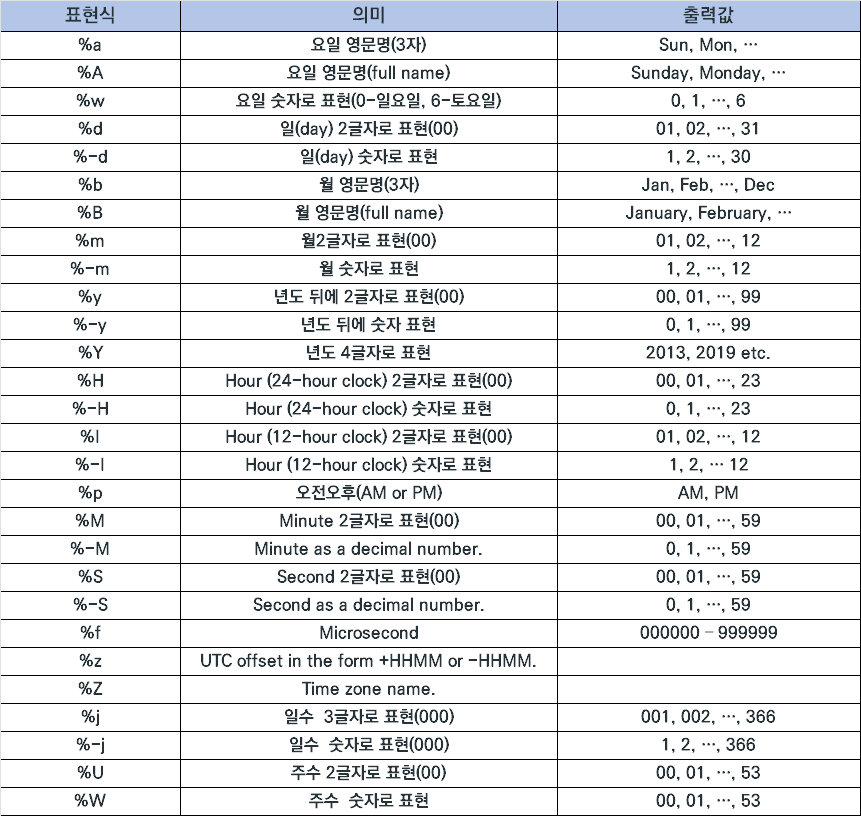

In [ ]:
pd_ts

Timestamp('2019-12-22 13:30:59')

In [ ]:
print('4digit, 24hour:',pd_ts.strftime('%Y/%m/%d %H:%M:%S')) # 4-digit year, 24-hour format

4digit, 24hour: 2019/12/22 13:30:59


In [ ]:
print('2digit, 12hour:',pd_ts.strftime('%y/%m/%d %I:%M:%S')) # 2-digit year, 12-hour format

2digit, 12hour: 19/12/22 01:30:59


In [ ]:
print('2digit, 12hour:',pd_ts.strftime('%h/%d %I:%M')) # 월영문명, 12-hour format

2digit, 12hour: Dec/22 01:30


- 문자열을 pandas Timestamp로 변환

In [ ]:
pd.Timestamp(2019, 12, 22, 1, 30, 59)

Timestamp('2019-12-22 01:30:59')

In [ ]:
# convert string to pandas Timestamp

df= pd.to_datetime('2019-12-22 01:30:59')
df

Timestamp('2019-12-22 01:30:59')

- pandas Timestamp를 Python standard datetime 으로 변환


In [ ]:
# convert pandas Timestamp to native Python datatime

df.to_pydatetime()


datetime.datetime(2019, 12, 22, 1, 30, 59)

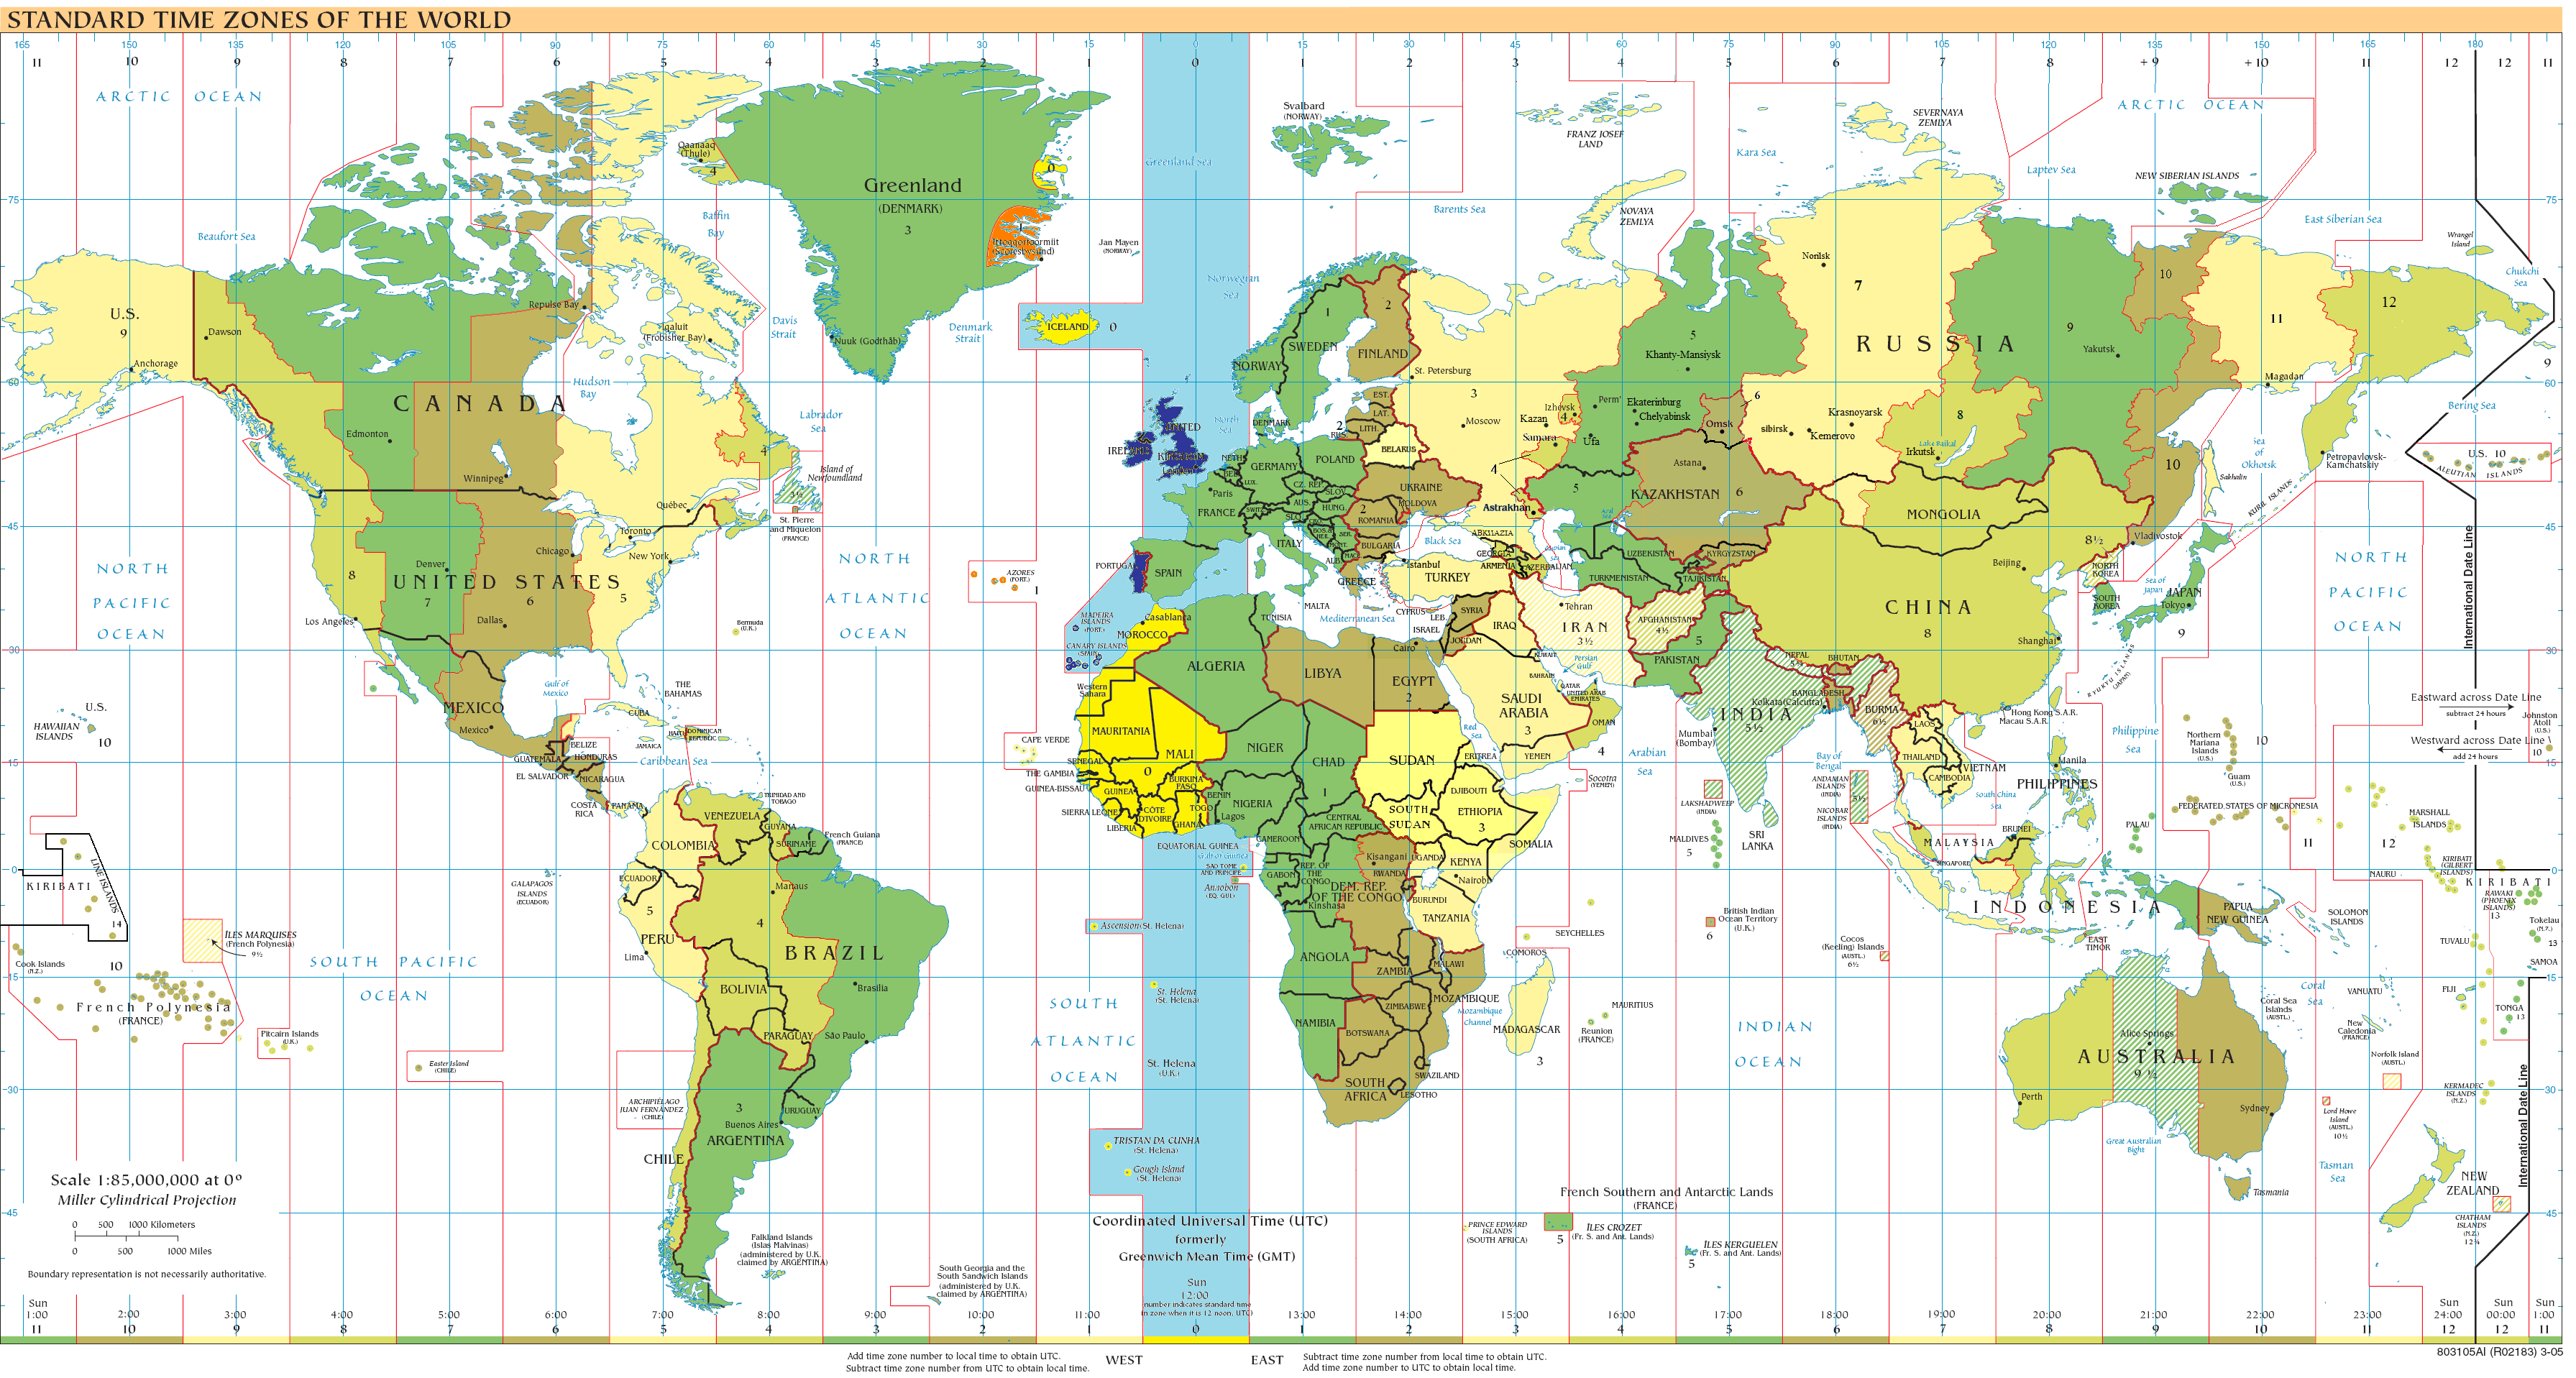

* 출처: https://ko.wikipedia.org/wiki/UTC%C2%B100:00

## 나.타임존 표현하기

In [ ]:
df

Timestamp('2019-12-22 01:30:59')

In [ ]:
ts_utc = df.tz_localize('UTC')
ts_utc

Timestamp('2019-12-22 01:30:59+0000', tz='UTC')

In [ ]:
ts_LST = df.tz_localize('Asia/Seoul')
ts_LST

Timestamp('2019-12-22 01:30:59+0900', tz='Asia/Seoul')

 - 타임존 변환하기

In [ ]:
print(ts_utc.tz_convert('Asia/Seoul'))

2019-12-22 10:30:59+09:00


In [ ]:
print(ts_LST.tz_convert('UTC'))

2019-12-21 16:30:59+00:00


#6.pandas library  데이터처리 연습
* 기상자료개방포털 : 기상청 기상자료 다운로드 받을 수 있음.
*  https://data.kma.go.kr/cmmn/main.do
* 서울기상대 2020년 시간자료를 이용한 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/BigData_Study/SURFACE_ASOS_108_HR_2020_2020_2021.csv'
,encoding='CP949')  # 데이터불러오기
df.head(3)

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,2020-01-01 00:00,-6.5,0.0,0.0,0,38,1.4,-18.5,1022.6,...,Sc,9.0,2000,NaN,5.0,-2.8,-0.8,0.7,2.1,3.2
1,108,2020-01-01 01:00,-5.9,NaN,1.7,50,40,1.6,-17.3,1021.8,...,Sc,7.0,2000,NaN,5.0,-2.4,-0.8,0.7,2.1,3.2
2,108,2020-01-01 02:00,-5.7,NaN,0.1,0,42,1.7,-16.5,1021.6,...,Sc,7.0,1988,NaN,5.0,-2.4,-0.8,0.6,2.0,3.1


In [ ]:
df=df.set_index('일시')
df.head(3)

,지점,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00,108,-6.5,0.0,0.0,0,38,1.4,-18.5,1022.6,1033.8,...,Sc,9.0,2000,NaN,5.0,-2.8,-0.8,0.7,2.1,3.2
2020-01-01 01:00,108,-5.9,NaN,1.7,50,40,1.6,-17.3,1021.8,1033.0,...,Sc,7.0,2000,NaN,5.0,-2.4,-0.8,0.7,2.1,3.2
2020-01-01 02:00,108,-5.7,NaN,0.1,0,42,1.7,-16.5,1021.6,1032.8,...,Sc,7.0,1988,NaN,5.0,-2.4,-0.8,0.6,2.0,3.1


In [ ]:
df_temp=df[['기온(°C)','풍속(m/s)','풍향(16방위)']]

In [ ]:
df_temp.head(3)

,일시,기온(°C),풍속(m/s),풍향(16방위)
0,2020-01-01 00:00:00,-6.5,0.0,0
1,2020-01-01 01:00:00,-5.9,1.7,50
2,2020-01-01 02:00:00,-5.7,0.1,0


In [ ]:
df_temp = df_temp.reset_index()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   일시        8784 non-null   object 
 1   기온(°C)    8783 non-null   float64
 2   풍속(m/s)   8784 non-null   float64
 3   풍향(16방위)  8784 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 274.6+ KB


In [ ]:
df_temp['일시'] = pd.to_datetime(df_temp['일시'])

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   일시        8784 non-null   datetime64[ns]
 1   기온(°C)    8783 non-null   float64       
 2   풍속(m/s)   8784 non-null   float64       
 3   풍향(16방위)  8784 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 274.6 KB


In [ ]:
# 날짜 groupby
df_temp_gr = df_temp.groupby(pd.Grouper(key="일시", freq="5D")).mean()
df_temp_gr

,기온(°C),풍속(m/s),풍향(16방위)
일시,,,
2020-01-01,0.125833,1.567500,170.250000
2020-01-06,2.041667,2.889167,182.583333
2020-01-11,-1.741667,2.021667,267.166667
2020-01-16,0.130000,1.943333,234.583333
2020-01-21,2.803333,1.707500,183.750000
...,...,...,...
2020-12-11,-1.631667,2.565833,249.333333
2020-12-16,-4.855833,2.365000,227.250000
2020-12-21,1.423333,2.234167,187.166667


In [ ]:
df_temp.groupby(pd.Grouper(key="일시", freq="m")).mean()

,기온(°C),풍속(m/s),풍향(16방위)
일시,,,
2020-01-31,1.627554,2.160618,190.201613
2020-02-29,2.525431,2.317529,210.646552
2020-03-31,7.669624,2.541667,220.981183
2020-04-30,11.084028,2.991389,236.500000
2020-05-31,18.006452,2.361962,206.908602
2020-06-30,23.879861,2.321528,224.347222
2020-07-31,24.134677,2.391129,145.282258
2020-08-31,26.506729,2.326210,167.110215
2020-09-30,21.403611,2.449306,151.597222
